In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 1

df = pd.read_csv('HR.csv')

In [3]:
# 2

df['satisfaction_level'].describe()

count    14999.000000
mean         0.612834
std          0.248631
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [4]:
df['last_evaluation'].describe()

count    14999.000000
mean         0.716102
std          0.171169
min          0.360000
25%          0.560000
50%          0.720000
75%          0.870000
max          1.000000
Name: last_evaluation, dtype: float64

In [5]:
df['number_project'].describe()

count    14999.000000
mean         3.803054
std          1.232592
min          2.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          7.000000
Name: number_project, dtype: float64

In [6]:
df['average_montly_hours'].describe()

count    14999.000000
mean       201.050337
std         49.943099
min         96.000000
25%        156.000000
50%        200.000000
75%        245.000000
max        310.000000
Name: average_montly_hours, dtype: float64

In [7]:
df['time_spend_company'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

In [10]:
df['Work_accident'].mode()[0]

0

In [11]:
df['left'].mode()[0]

0

In [12]:
df['promotion_last_5years'].mode()[0]

0

In [13]:
df['department'].mode()[0]

'sales'

In [14]:
df['salary'].mode()[0]

'low'

In [18]:
# 3

df_new = df.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]

<Axes: >

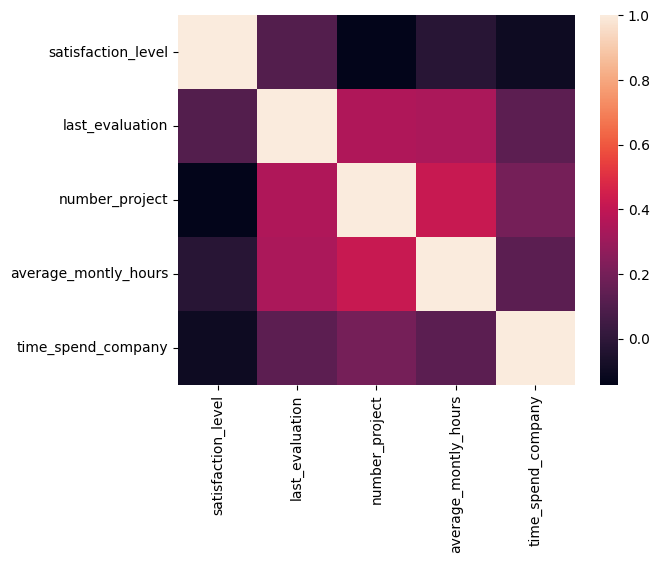

In [20]:
sns.heatmap(df_new.corr())

In [34]:
df_new.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


Самые скоррелированные - number_project и average_monthly_hours
Самые менее скоррелированные - average_monthly_hours и satisfaction_level

In [15]:
# 4

df_q_emp = pd.DataFrame()
df_q_emp['quantity_of_employees'] = df.groupby('department').agg(len)['satisfaction_level']
df_q_emp['quantity_of_employees']

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: quantity_of_employees, dtype: int64

<Axes: xlabel='Размер зарплаты', ylabel='Количество сотрудников'>

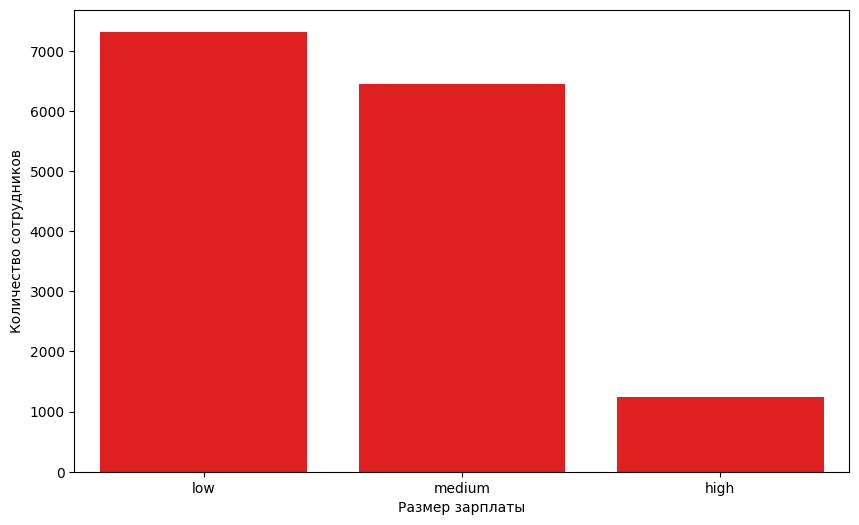

In [23]:
# 5 
plt.figure(figsize=(10, 6))
plt.xlabel('Размер зарплаты')
plt.ylabel('Количество сотрудников')
sns.barplot(df['salary'].value_counts(), color='red')

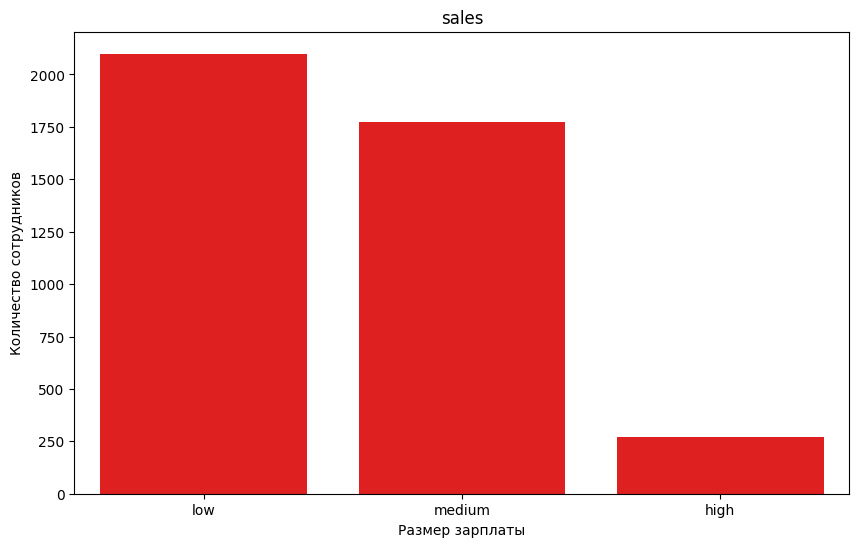

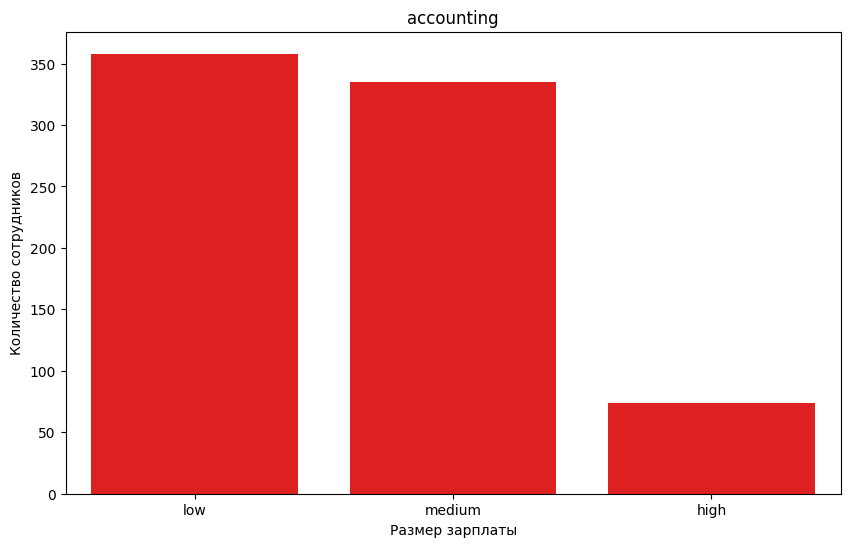

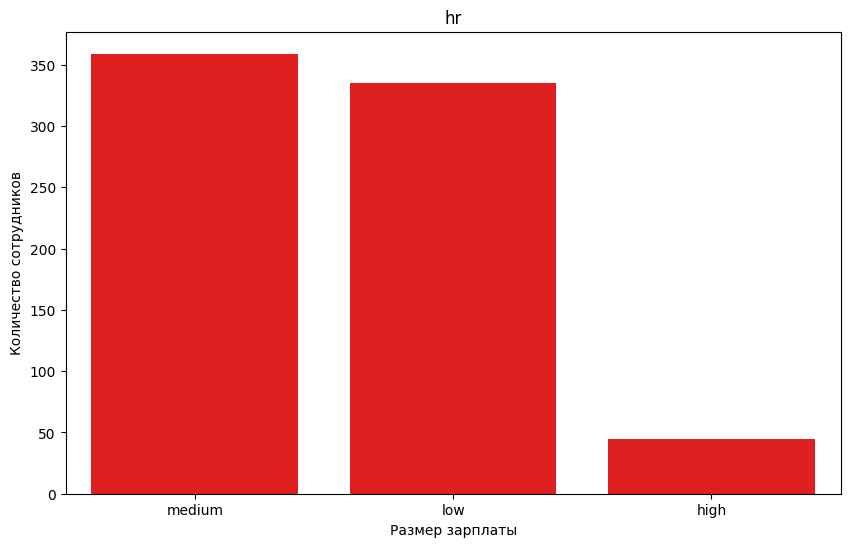

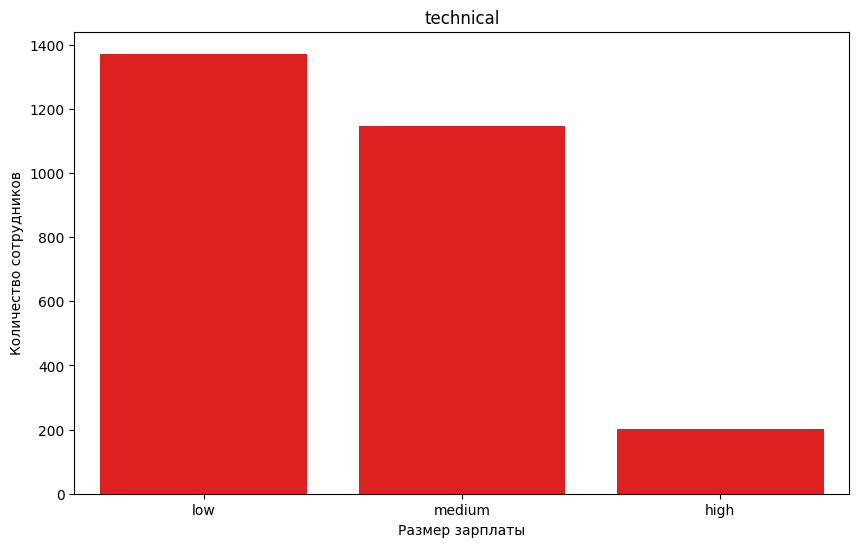

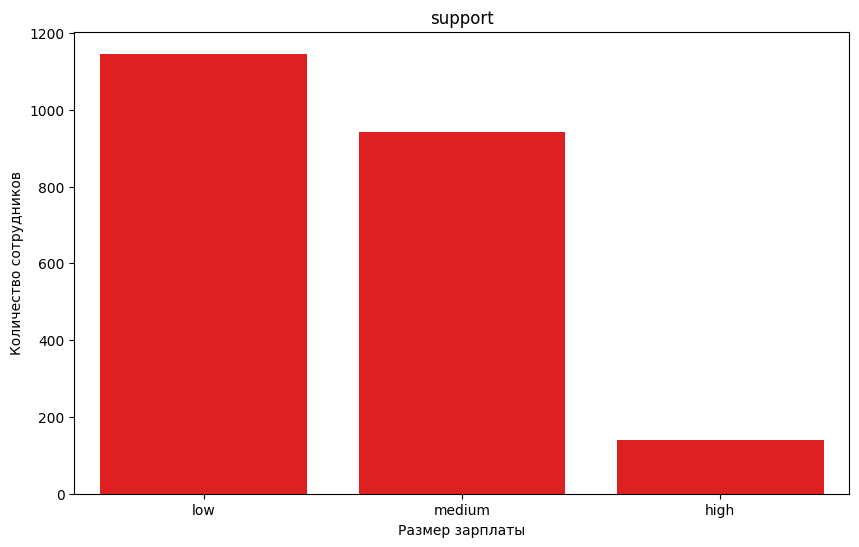

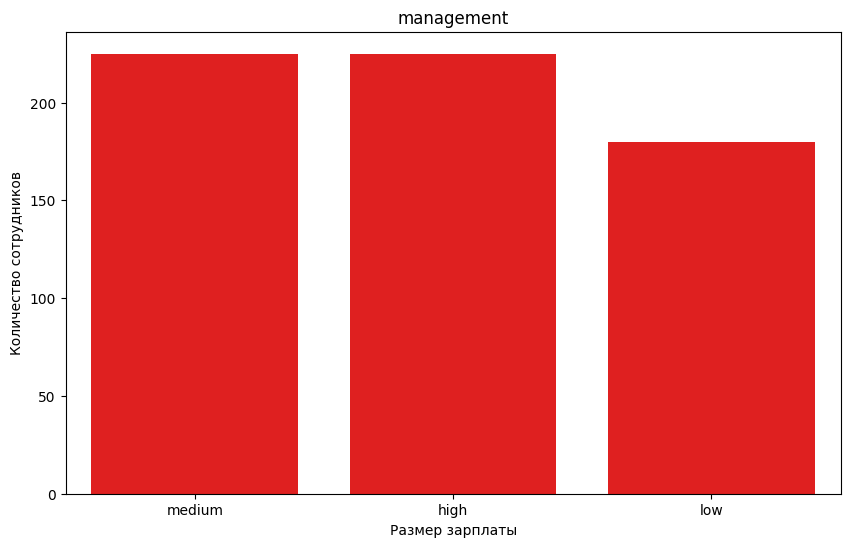

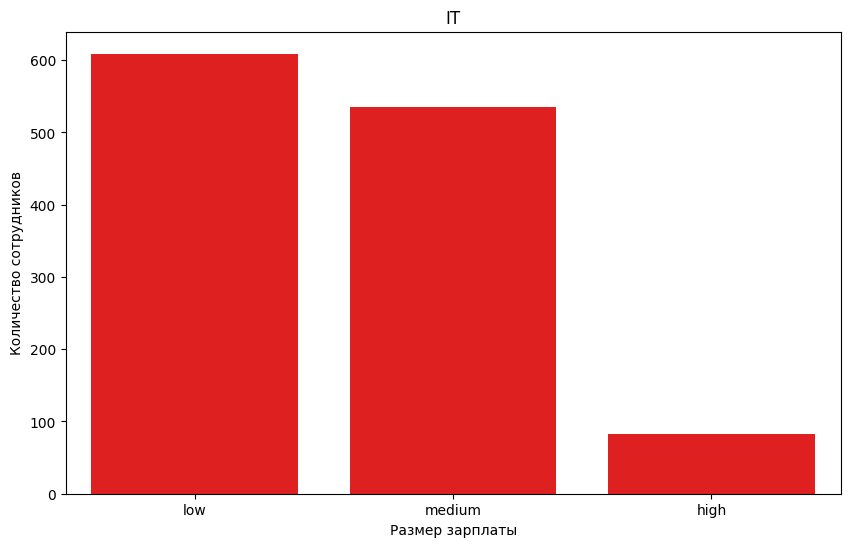

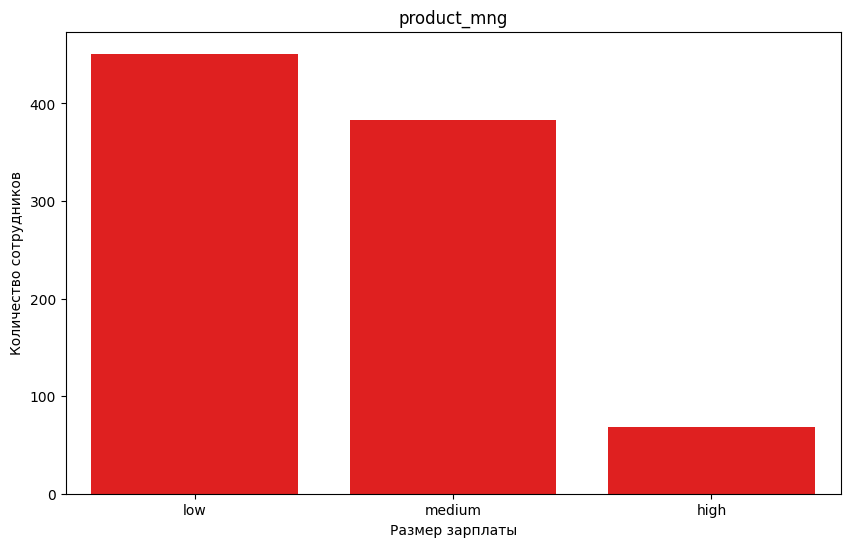

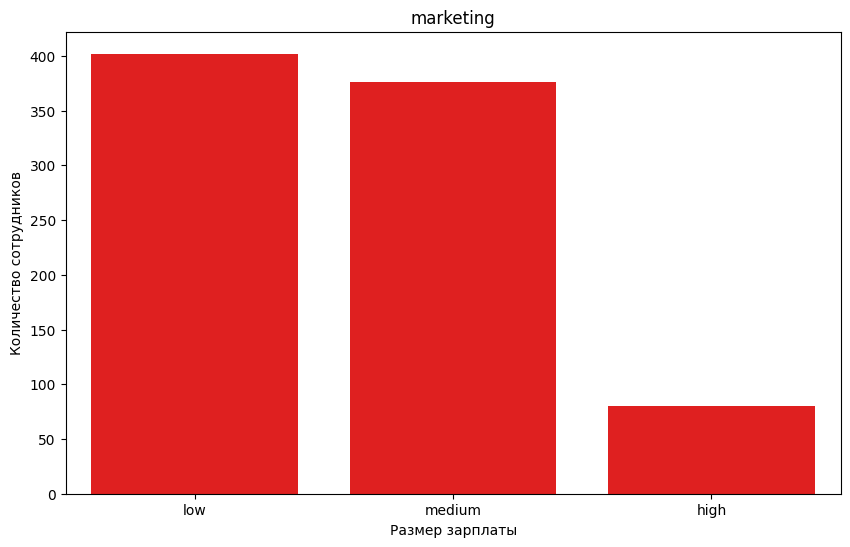

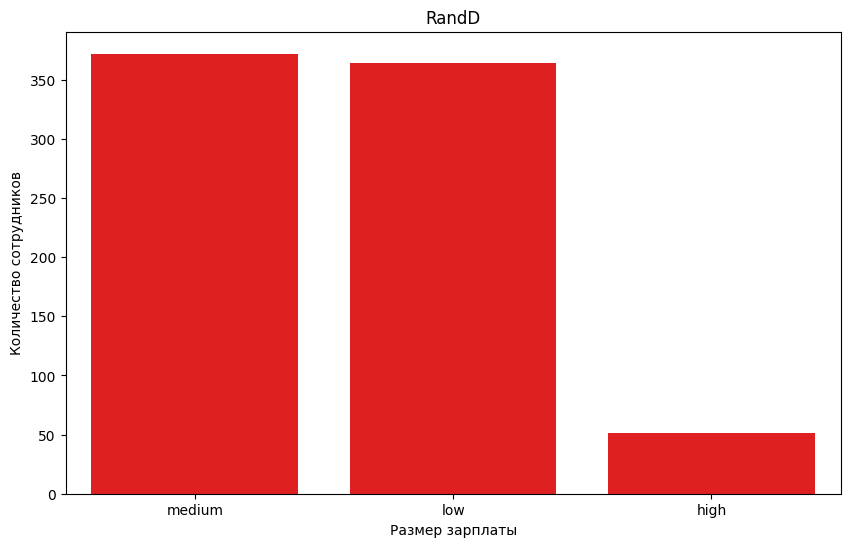

In [24]:
for dep in df['department'].unique():
    plt.figure(figsize=(10, 6))
    plt.title(dep)
    plt.xlabel('Размер зарплаты')
    plt.ylabel('Количество сотрудников')
    sns.barplot(df[df['department'] == dep]['salary'].value_counts(), color='red')

In [36]:
# 7
from scipy import stats as st

pvalue = st.f_oneway(df[df['salary'] == 'high']['average_montly_hours'], df[df['salary'] == 'low']['average_montly_hours']).pvalue
alpha = 0.05

if pvalue >= alpha:
    print('Принимаем нулевую гипотезу. Среднее количество рабочих часов в месяц у работников с низкой зарплатой \n\
не отличается статистически значимо от среднего количества рабочих часов работников с высокой ЗП.')
else:
    print('Отвергаем нулевую гипотезу. Среднее количество рабочих часов в двух группах различно.')

Принимаем нулевую гипотезу. Среднее количество рабочих часов в месяц у работников с низкой зарплатой 
не отличается статистически значимо от среднего количества рабочих часов работников с высокой ЗП.


In [52]:
# 8

for item in df['left'].unique():
    if item == 1:
        print('Уволившиеся')
    else:
        print('Оставшиеся')
    print('Доля повышенных: ', round(df[df['left'] == item]['promotion_last_5years'].value_counts(1).iloc[1], 3))
    print('Средний уровень удовлетворения: ', round(df[df['left'] == item]['satisfaction_level'].mean(), 2))
    print('Среднее количество проектов: ', round(df[df['left'] == item]['number_project'].mean()))
    print()

Уволившиеся
Доля повышенных:  0.005
Средний уровень удовлетворения:  0.44
Среднее количество проектов:  4

Оставшиеся
Доля повышенных:  0.026
Средний уровень удовлетворения:  0.67
Среднее количество проектов:  4



In [61]:
# 9

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import recall_score, precision_score 

x_train, x_test, y_train, y_test = train_test_split(df.select_dtypes('int64').drop('left', axis=1), df['left'], test_size=0.2, random_state=42)
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(recall_score(pred, y_test))
print(precision_score(pred, y_test))

0.0
0.0


In [65]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

model.fit(x_train, y_train)
pred = model.predict(x_test)
print(recall_score(pred, y_test))
print(precision_score(pred, y_test))

Learning rate set to 0.029767
0:	learn: 0.6500061	total: 7.91ms	remaining: 7.91s
1:	learn: 0.6102133	total: 15.3ms	remaining: 7.64s
2:	learn: 0.5735109	total: 23.3ms	remaining: 7.76s
3:	learn: 0.5410230	total: 30.1ms	remaining: 7.5s
4:	learn: 0.5101635	total: 36.5ms	remaining: 7.27s
5:	learn: 0.4847860	total: 74.3ms	remaining: 12.3s
6:	learn: 0.4608385	total: 83ms	remaining: 11.8s
7:	learn: 0.4379256	total: 89ms	remaining: 11s
8:	learn: 0.4175127	total: 97.8ms	remaining: 10.8s
9:	learn: 0.3984647	total: 105ms	remaining: 10.4s
10:	learn: 0.3816797	total: 112ms	remaining: 10s
11:	learn: 0.3668632	total: 118ms	remaining: 9.67s
12:	learn: 0.3524359	total: 123ms	remaining: 9.34s
13:	learn: 0.3389336	total: 129ms	remaining: 9.08s
14:	learn: 0.3267685	total: 134ms	remaining: 8.81s
15:	learn: 0.3151033	total: 139ms	remaining: 8.57s
16:	learn: 0.3049647	total: 145ms	remaining: 8.38s
17:	learn: 0.2956938	total: 150ms	remaining: 8.2s
18:	learn: 0.2866195	total: 155ms	remaining: 8.02s
19:	learn: 0